<a href="https://colab.research.google.com/github/GustavoDavila77/Curso-de-introducci-n-al-machine-learning/blob/master/clase_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
#para trabajar con arreglos
import numpy as np
#module for work with neuronal network
#for this case we use because nn have a linear regression
import torch.nn as nn
#necessary optimization for calcule gradients and do backpropagation
import torch.optim as optim

#show graphics
import matplotlib.pyplot as plt

In [0]:
new_tensor = torch.tensor([[1.0, 2.0],[3.0, 4.0]])
print(torch.mean(new_tensor, dim=1),
      torch.mean(new_tensor, dim=0),
      torch.mean(new_tensor))

tensor([1.5000, 3.5000]) tensor([2., 3.]) tensor(2.5000)


Linear Regression

---



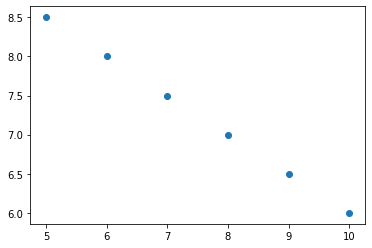

In [0]:
#se establece 2 arreglos con un relación lineal
#el precio de una carro es directamente proporcional a las unidades vendidas
car_prices = [5, 6, 7, 8, 9, 10]
units_sold = [8.5, 8, 7.5, 7.0, 6.5, 6.0]

plt.scatter(car_prices, units_sold)

In [0]:
# representation in numpy
#reshape is for show in other form and can enter in tensor
#reshape(filas, columnas)
#reshape(-1, 1) -1 mean rows is inferred
prices_array = np.array(car_prices).reshape(-1,1)
units_sold = np.array(units_sold).reshape(-1,1)

prices_array

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [0]:
# array in numpy to tensor
# requieres_grad_ let have gradients in mode active
# el último _ significa que se va a modificar el array con
#el que estamos trabajando y el tensor es el que sufre la modificación 
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
#don´t active gradients because are my target
units = torch.from_numpy(units_sold).float()

prices, prices.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

0.011129999533295631


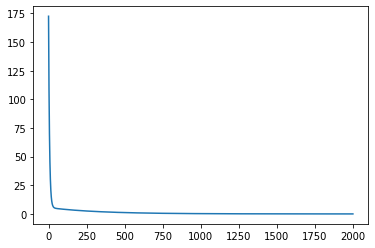

In [0]:
#model bulding
#(1,1) input and output dimension
model = nn.Linear(1,1)

#mean squared error
loss_fuction = nn.MSELoss()

#stochastic gradient descent
#model.parameters() weight is get from model parameters
# lr : learning rate - set value arbitrary 
# lr: size of steps in each iteration
optimizer = optim.SGD(model.parameters(), lr= 0.016)

losses = []
iterations = 2000

for i in range(iterations):
  #forward pass - prediction
  pred = model(prices)
  #calculate loss with prediction data and real data(units)
  loss = loss_fuction(pred, units)
  losses.append(loss.data)

  #se reinicia el calculo de gradientes
  #pytorch acumula los gradiente y altera el resultado
  optimizer.zero_grad()
  #backpropagation
  loss.backward()
  #go step toward optimization
  optimizer.step()

#se imprime el último loss
print(float(loss))
#se imprime las iteraciones y las perdidas
plt.plot(range(iterations), losses)  

In [0]:
#predicción después del entrenamiento
x = torch.Tensor([[12.0]])
p = model(x)
p

tensor([[5.2478]], grad_fn=<AddmmBackward>)

Regresión Logística

---



In [0]:
#pares
n = 100
# // división entera  / para resultado float
h = n//2
dimen = 2

#se generan nums random para luego entrar a clasificarlos

#como se va a centrar alrededor de 3.3 y -3.3 entonces 
#para que esten un poco más cercanos se multiplica por 3 (hacer prueba)
data = np.random.randn(n, dimen)*3
data 

array([[ 3.92184853,  2.54186426],
       [-1.80502957, -2.34850509],
       [-3.36069748, -3.6014479 ],
       [ 1.3884686 ,  0.95306201],
       [-0.76449305, -1.64425022],
       [ 7.42673215, -1.21015668],
       [ 0.11386825, -1.7164535 ],
       [-3.87903177,  0.83093201],
       [ 1.70650371, -2.24850152],
       [ 4.88786601, -1.79913045],
       [-9.60777997,  2.1108759 ],
       [-1.05697411, -1.5030982 ],
       [ 2.34432683,  2.96632898],
       [-5.87164957, -2.95957303],
       [-2.26183994,  2.84379533],
       [ 4.20908394,  3.12530713],
       [ 1.73883878, -0.3535477 ],
       [-1.03897328, -4.62100595],
       [-0.08154429, -1.78883906],
       [-0.56425851, -4.38685264],
       [ 4.80229758,  0.85615199],
       [ 2.98960675, -1.26903737],
       [ 1.05074285, -2.85371453],
       [-2.39934249, -3.67416864],
       [ 0.72532792,  0.20999713],
       [ 0.98293769, -2.58545781],
       [ 0.67591432, -0.36133603],
       [ 2.05904738,  4.01956045],
       [-6.85460015,

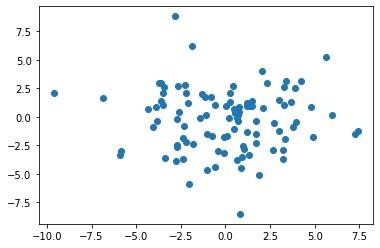

In [0]:
#en el eje x la 1era col, en "y" la 2da col

#En esta parte se estan preparando los datos
#se escogen 2 datos arbitrarios -3.3 y 3.3 
# y centrar todos los puntos generados alrededor de ellos 
# con la intensión de que queden claramente separados 
#para que el clasificador le sea más facil predecir. 
plt.scatter(data[: ,0], data[ : ,1])

In [0]:
#la 1era mitad se agrupa hacia el -3
data[:h, :] = data[:h, :] - 3*np.ones((h,dimen))

In [0]:
#la otra mitad se agrupa hacia el 3
data[h:, :] = data[h:, :] + 3*np.ones((h,dimen))

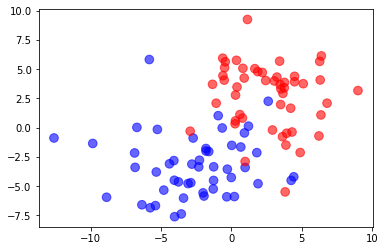

In [0]:
colors = ['blue', 'red']

#s: size
#alpha: transparency
#se crear un array con la mitad en azul y la otra en rojo, tamaño n
color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)
plt.scatter(data[: ,0], data[ : ,1], c=color, s=75, alpha= 0.6)

In [0]:
#el target va hacer un array de 0 y 1's
#la primera mitad representando los azules y la otra los rojos
#esto se puede determinar de esta forma por la separación que se logró
target = np.array([0]*h + [1]*h).reshape(n,1)

#las entradas son pares
x = torch.from_numpy(data).float().requires_grad_(True)

y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

tensor(0.1988, grad_fn=<BinaryCrossEntropyBackward>)

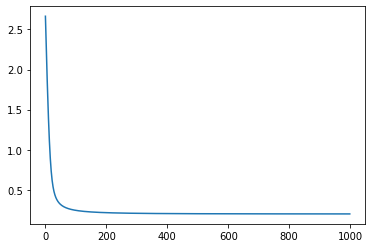

In [0]:
#sequential permite combinar multiples funciones
#Linear(2,1) porque en la entrada tengo 1 par y la salida es un solo dato(probabilidad)
#la función sigmoid nos permite clasificar
model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

#Binary cross entropy or Log Loss
loss_function = nn.BCELoss()

#los pesos vienen de los parametros del modelo
optimizer = optim.SGD(model.parameters(), lr=0.01)

losses = []

iterations = 1000

for i in range(iterations):
  result = model(x)
  loss = loss_function(result, y)
  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

plt.plot(range(iterations), losses)
loss
 

In [0]:
#validar que el modelo este prediciendo bien

blue = torch.Tensor([[-5, -6]])
predictionaux = model(blue)
#predictions arroja una probabilidad
#si esta probabilidad es menor a 0.5 significa que es azul, si > 0.5 es rojo
#print(predictionaux)
#print(model(blue).data[0][0])
#print(data[0][0])
#aun no se comprende para que se utiliza el data[0][0] dado que usando solo model(blue) nos arroja el mismo resultado 
prediction = model(blue).data[0][0] > 0.5
#como se establece que si es falso es azul y si es true es rojo? si colors solo es un array 
print(colors[prediction])

red = torch.Tensor([[8, 6]])
prediction = model(red).data[0][0] > 0.5
print(colors[prediction])


blue
red


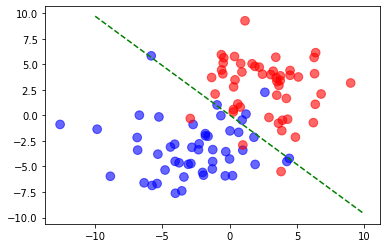

In [0]:
#miremos como el modelo hace la separación
#se optinen los pesos y se separan 2 porque las entradas son de dimensión 2
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0], data[:,1], c = color, s=75, alpha= 0.6)

#se dibuja la linea que separa las 2 clasificaciones 
#-10 y 10 es el rango, linspace permite distribuir uniformemente n datos en el rango dado
x_axis = np.linspace(-10, 10, n)
#no se explicó bien el eje y, solo que es en base a los pesos que nos ofrese el sigmoide
#print(w1[0])
#print(x_axis*w0[0][0])
#print(w0[0][1])
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
plt.plot(x_axis, y_axis, 'g--')